<h1>Prova 1 - Introdução à Ciência dos Dados</h1>
<h3>Daniel Freitas Martins - 2304</h3>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import percentileofscore
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def analisarAmostraPopulacao(populacao, amostra, limiar=0.05):
    print("\t\t\t Amostra "+str(i))
    
    media_populacao=populacao.mean()
    media_amostra=np.mean(amostra)
    erro_padrao=populacao.std() / np.sqrt(len(amostra))
    z_score = abs(media_amostra - media_populacao) / erro_padrao
    valor_p = 2*st.norm.sf(abs(z_score))
    
    print("Média População: %.3f" % (media_populacao))
    print("Média Amostra: ",(media_amostra))
    print("Erro Padrão:"+str(erro_padrao))
    print("A diferença entre a média da amostra e da população é de %.3f erros padrões." % (z_score))
    print("Valor-p: %.10f" % (valor_p))
    
    if(valor_p < limiar):
        print("Provavelmente a Amostra NÃO veio da População.")
    else:
        print("Provavelmente a Amostra VEIO da População.")
        
    print("\n\n")


In [14]:
def lerCSV(caminho_arquivo, header):
    return pd.read_csv(caminho_arquivo, index_col=False, header=header, squeeze=True)

In [3]:
def analisarDuasAmostras(amostra_1, amostra_2):
    amostras = []
    amostras.append(amostra_1)
    amostras.append(amostra_2)
    print('Média amostra 1:         %.2f' % (np.mean(amostra_1)))
    print('Desvio padrão amostra 1: %.2f\n' % (np.std(amostra_1)))
    print('Média amostra 2:         %.2f' % (np.mean(amostra_2)))
    print('Desvio padrão amostra 2: %.2f\n' % (np.std(amostra_2)))
    print('Média de ambas as amostras:         %.2f' % (np.mean(amostras)))
    print('Desvio padrão de ambas as amostras: %.2f' % (np.std(amostras)))
    plt.hist(amostras, 100, density=True, align='mid')
    plt.show()

In [4]:
def getIntervaloConfianca95(data):
    # 95% intervalo confiança
    mean=data.mean()
    sd=data.std()
    n=len(data)
    std_error=sd/np.sqrt(n)
    print("Erro padrao %.3f " % std_error)
    print("Intervalo de confiança: %.3f - %.3f " % ((mean-(1.96*std_error)),(mean+(1.96*std_error))))    
    return mean,1.96*std_error

In [6]:
def getNumeroErrosPadroesDiferencaMedias(data1, data2): #str_error_diff_mean
    mean1=data1.mean()
    mean2=data2.mean()
    std1=data1.std()
    std2=data2.std()
    n1=len(data1)
    n2=len(data2)
    std_error_diff=np.sqrt((np.power(std1,2)/n1) + (np.power(std2,2)/n2))
    diff_mean=mean1-mean2
    print("Diferencas das medias: %.3f " % diff_mean)
    print("Erro padrão: %.3f " % std_error_diff)
    return (diff_mean/std_error_diff)

In [7]:
def gerarErrorBar(data_1, data_2, titulo_data_1 = 'data1', titulo_data_2 = 'data2'):
    mean_data_1,std_error_data_1=confidence_interval(data1)
    mean_data_2,std_error_data_2=confidence_interval(data2)
    x = [mean_data_1, mean_data_2]
    y = [1, 3]
    errors = [std_error_data_1, std_error_data_2]
    plt.figure()
    plt.errorbar(x, y, xerr=errors, fmt = 'o', color = 'k')
    plt.yticks((0, 1, 3, 4), ('', titulo_data_1, titulo_data_2,'')) 
    plt.show()

In [8]:
def gerarHistogramaDuasAmostras(amostra_1, amostra_2):
    amostras = []
    amostras.append(amostra_1)
    amostras.append(amostra_2)
    plt.hist(amostras, 100, density=True, align='mid', color=['b', 'r'])
    plt.show()

<h2>Lendo dados de "Filmes-Prova01.csv", correspondentes a lista de filmes de quatro plataformas de <i>Streaming</i> (Netflix, Amazon Prime, Disney+ e Hulu)</h2>

In [15]:
df = lerCSV("Filmes-Prova01.csv", header=0)
df.head(3)

,ID,Titulo,Ano,Classificacao_etaria,IMDb,Netflix,Hulu,Amazon_prime,Disney+,Diretores,Generos,Pais,Idioma,Duracao_min
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0


<h2>1) Quantos filmes cada uma das 4 plataformas possui? Faça um gráfico de barras para ilustrar esses valores</h2>

Quantidade de filmes em cada plataforma:
	- Netflix: 3560
	- Hulu: 903
	- Amazon Prime: 12354
	- Disney+: 564


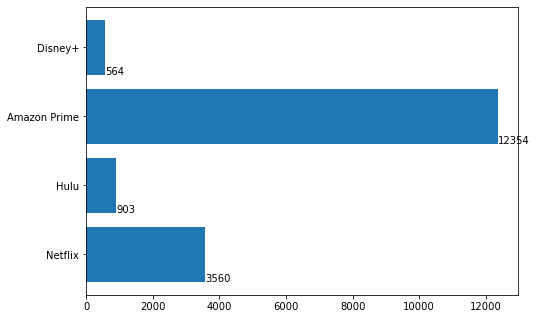

In [29]:
qtd_filmes_netflix = df['Netflix'].sum()
qtd_filmes_hulu = df['Hulu'].sum()
qtd_filmes_amazon = df['Amazon_prime'].sum()
qtd_filmes_disney = df['Disney+'].sum()
print("Quantidade de filmes em cada plataforma:")
print("\t- Netflix:", qtd_filmes_netflix)
print("\t- Hulu:", qtd_filmes_hulu)
print("\t- Amazon Prime:", qtd_filmes_amazon)
print("\t- Disney+:", qtd_filmes_disney)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plataformas = ['Netflix', 'Hulu', 'Amazon Prime', 'Disney+']
qtd_filmes_plataformas = [qtd_filmes_netflix, qtd_filmes_hulu,
                         qtd_filmes_amazon, qtd_filmes_disney]
ax.barh(plataformas, qtd_filmes_plataformas)
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_width()+5,p.get_y()))
plt.show()

<h2>2) Quantos filmes estão em mais de uma plataforma?</h2>

In [47]:
qtd = 0
for index, row in df.iterrows(): # iterando sobre todas as linhas
    if(row['Netflix'] == 1): # se tiver em Netflix, avaliar se tem para algum outro
        if(row['Hulu'] == 1 or row['Amazon_prime'] == 1 or row['Disney+'] == 1):
            qtd+=1 # se tiver para Netflix e algum outro, soma 1
            continue # vá para a próxima linha
    if(row['Hulu'] == 1): # se tiver em Hulu, já sabemos que não tem em Netflix
        if(row['Amazon_prime'] == 1 or row['Disney+'] == 1): # avaliando para os restantes
            qtd+=1 # Analogamente, soma-se 1 se tiver para Hulu e outra plataforma
            continue
    if(row['Amazon_prime'] == 1):
        if(row['Disney+'] == 1):
            qtd+=1
            continue
print("Nº de filmes que estão em mais de uma plataforma:", qtd)

Nº de filmes que estão em mais de uma plataforma: 627


<h2>3) Qual a plataforma que possui a maior média de nota IMDb?</h2>

In [37]:
df_filmes_netflix = df[df['Netflix'] == 1]
df_filmes_hulu = df[df['Hulu'] == 1]
df_filmes_amazon = df[df['Amazon_prime'] == 1]
df_filmes_disney = df[df['Disney+'] == 1]

In [56]:
def calcularMediaIMDb(df, nome_plataforma, df2):
    media = df['IMDb'].sum() / len(df2)
    print('Média de nota IMDb da plataforma', nome_plataforma, "=", media)
    return media

<h4>Considerando no cálculo das médias apenas os filmes presentes em cada plataforma:</h4>

In [ ]:
media_netflix = calcularMediaIMDb(df_filmes_netflix, 'Netflix', df_filmes_netflix)
media_hulu = calcularMediaIMDb(df_filmes_hulu, 'Hulu', df_filmes_hulu)
media_amazon = calcularMediaIMDb(df_filmes_amazon, 'Amazon Prime', df_filmes_amazon)
media_disney = calcularMediaIMDb(df_filmes_disney, 'Disney+', df_filmes_disney)

<p>A plataforma que possui maior média de nota IMDb é a <b>Disney+</b>, com uma média de aproximadamente 6.43.</p>

<h4>Considerando no cálculo das médias toda a base de dados, inclusive os filmes não presentes em determinadas plataformas:</h4>

In [57]:
media_netflix = calcularMediaIMDb(df_filmes_netflix, 'Netflix', df)
media_hulu = calcularMediaIMDb(df_filmes_hulu, 'Hulu', df)
media_amazon = calcularMediaIMDb(df_filmes_amazon, 'Amazon Prime', df)
media_disney = calcularMediaIMDb(df_filmes_disney, 'Disney+', df)

Média de nota IMDb da plataforma Netflix = 1.2853977544194934
Média de nota IMDb da plataforma Hulu = 0.3269947443860487
Média de nota IMDb da plataforma Amazon Prime = 4.104156712852365
Média de nota IMDb da plataforma Disney+ = 0.21658504538939322


<p>A plataforma que possui maior média de nota IMDb é a <b>Amazon Prime</b>, com uma média de aproximadamente 4.10.</p>

<h2>4) Qual o percentual de filmes de cada plataforma com nota IMDb maior que 8?</h2>

In [58]:
percentileofscore(df_filmes_netflix['IMDb'], 8, kind='weak')

c:\users\freitas\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:1949: RuntimeWarning: invalid value encountered in less_equal
  return np.count_nonzero(a <= score) / n * 100


93.06179775280899